In [1]:
import numpy as np  
import math
from enum import Enum
from collections import namedtuple

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline
# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties

# pandas
import pandas as pd  
# 常に全ての列（カラム）を表示
pd.set_option('display.max_columns', None)

# 家電

## 7.　温水暖房洗浄便座（ver自立P4）

### 7.1　定義

#### 7.1.1　機器の電源接続状態および動作状態

温水暖房洗浄便座の電源接続状態および動作状態は、以下を想定する。

* 電源接続状態：
    * 常時時、AC電源に接続される。  
* 動作状態：
    * 使用時には稼働状態のみが発生する。
    * 非使用時には待機状態もしくは停止状態が発生する。  

#### 7.1.2　機器の機能等

温水暖房洗浄便座が有する機能は、以下を想定する。  

* 主機能：
    * 暖房便座：ヒータの加熱方式が非瞬間方式の場合、稼働時と待機時に作動する。ヒータの加熱方式が瞬間方式の場合、稼働時に作動する。
    * 温水洗浄：ヒータの加熱方式が非瞬間方式の場合、稼働時と待機時に作動する。ヒータの加熱方式が瞬間方式の場合、稼働時に作動する。
* ヒータの加熱方式：
    * 非瞬間方式：稼働時と待機時の両方に主機能が作動する。    
    * 瞬間方式：稼働時のみに主機能が作動する。  
* ヒータの電源スイッチ：ヒータの電源スイッチで機能を有効化・無効化を切り替える。無効化された場合、動作状態は停止となる。（消費電力はゼロ。）

| 電源接続状態 | 動作状態 |　機能　 |  添え字 |  
|:-----------: |:-------: |:------: |:------: |    
|  AC電源接続  |稼働      |暖房便座 |ac,opg,st|  
|  AC電源接続  |稼働      |温水洗浄 |ac,opg,wt|   
|  AC電源接続  |待機      |暖房便座 |ac,sby,st|    
|  AC電源接続  |待機      |温水洗浄 |ac,sby,wt|    
|  AC電源接続  |停止      |暖房便座 |-        |    
|  AC電源接続  |停止      |温水洗浄 |-        |    

In [2]:
class HeaterType(Enum):
    """ヒータの加熱方式"""
    # NonInst：非瞬間方式（NonInstantaneously）
    # Inst：瞬間方式（Instantaneously）

    NonInst = "noninst"
    Inst = "inst"

In [3]:
class HeaterSwitch(Enum):
    """ヒータの電源スイッチ"""
    # Off：オフ
    # On：オン

    Off = "off"
    On = "on"

### 7.2　消費電力量

日付$d$の時刻$t$における温水洗浄暖房便座のAC電源接続時の消費電力量は、以下の式により表される。

* AC電源接続時：  
$$ 
\begin{equation}
    E_{E,ToiletSeat,ac,d,t} = E_{E,ac,opg,d,t} + E_{E,ac,sby,d,t}
\end{equation}
$$

ここで、  

$E_{E,ToiletSeat,ac,d,t}$：日付$d$の時刻$t$におけるAC電源接続時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,sby,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での待機時の単位時間当たりの消費電力量[Wh]  

である。

In [4]:
def EE_ac (EE_ac_stn):
    """AC電源接続時の消費電力量[Wh]を計算する""" 
    # EE_ac_stn：AC電源接続下での消費電力量[Wh]の配列
    
    return sum(EE_ac_stn)

### 7.3　稼働時および待機時の消費電力量

日付$d$の時刻$t$におけるAC電源接続下での稼働時および待機時の消費電力量は、以下の式により計算される。

* AC電源接続下での稼働時の消費電力量：  
$$ 
\begin{equation}
    E_{E,ac,opg,d,t} = P_{opg,d,t} \times dt_{ac,opg,d,t}  \div 3600
\end{equation}
$$
　　
* AC電源接続下での待機時の消費電力量：  
$$ 
\begin{equation}
    E_{E,ac,sby,d,t} = P_{sby,d,t} \times dt_{ac,sby,d,t}  \div 3600
\end{equation}
$$

ただし、  
$$ 
\begin{equation}
    dt_{ac,opg,d,t} +dt_{ac,sby,d,t} = dt_{calc}
\end{equation}
$$
を満たす。

ここで、  

$dt_{calc}$：単位時間[s]   
$dt_{ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時間の合計[s]  
$dt_{ac,sby,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での待機時間の合計[s]   
$E_{E,ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,ac,sby,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での待機時の単位時間当たりの消費電力量[Wh]   
$P_{opg,st,d,t}$：日付$d$の時刻$t$における稼働時の消費電力[W]  
$P_{sby,st,d,t}$：日付$d$の時刻$t$における待機時の消費電力[W]  

である。

In [5]:
def EE_ac_opg (dt_ac_opg, P_ac_opg):
    """AC電源接続下での稼働時の消費電力量[Wh]を計算する""" 
    # dt_ac_opg：稼働時間の合計[s]
    # P_ac_opg：稼働時の消費電力[W]

    return P_ac_opg * dt_ac_opg / 3600

In [6]:
def EE_ac_sby (dt_ac_sby, P_ac_sby):
    """AC電源接続下での待機時の消費電力量[Wh]を計算する""" 
    # dt_ac_sby：待機時間の合計[s]
    # P_ac_sby：待機時の消費電力[W]
    
    return P_ac_sby * dt_ac_sby / 3600

In [7]:
def check_duration (dt_calc, dt_stn):
    """合計が単位時間を超過しないか否かを確認する"""
    # dt_calc：単位時間[W]
    # dt_stn：稼働時間の合計[s]
    
    if dt_calc != sum(dt_stn):
        # 単位時間に等しくない場合 => エラー
        try:
            raise ValueError("Error: dt_calc < sum(dt_stn)")
        except ValueError as e:
            print(e)
    else:
        pass

### 7.4　稼働時の消費電力

日付$d$の時刻$t$における稼働時消費電力は、暖房便座が機能することによる消費電力と温水洗浄が機能することによる消費電力の合計であり、以下の式により計算される。

* AC電源接続下での稼働時の消費電力量：  
$$ 
\begin{equation}
    P_{opg,d,t} =  P_{opg,st,d,t} + P_{opg,wt,d,t}
\end{equation}
$$

ここで、  
$P_{opg,st,d,t}$：日付$d$の時刻$t$における稼働時の消費電力[W]  
$P_{opg,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$P_{opg,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
である。

In [8]:
def P_opg(Prtd_opg_st, Prtd_opg_wt, seat_heater_type, water_heater_type, seat_heater_switch, theta_toilet_ave):
    """稼働時の消費電力[W]を計算する"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W]  
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]  
    # seat_heater_type：便座ヒータの加熱方式[非瞬間方式、瞬間方式]  
    # water_heater_type：洗浄水ヒータの加熱方式[非瞬間方式、瞬間方式]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]  
    
    if seat_heater_type == HeaterType.NonInst and water_heater_type == HeaterType.NonInst:
        P_opg = P_opg_noninst_noninst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave)
    
    elif seat_heater_type == HeaterType.Inst and water_heater_type == HeaterType.NonInst:
        P_opg =  P_opg_inst_noninst(Prtd_opg_wt, seat_heater_switch, theta_toilet_ave)
        
    elif seat_heater_type == HeaterType.NonInst and water_heater_type == HeaterType.Inst:
        P_opg =  P_opg_noninst_inst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch,  theta_toilet_ave)
        
    elif seat_heater_type == HeaterType.Inst and water_heater_type == HeaterType.Inst:
        P_opg = P_opg_inst_inst(Prtd_opg_wt, theta_toilet_ave)
            
    return P_opg

日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力および日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力は、便座ヒータおよび洗浄水ヒータの加熱方式に応じて以下の式により計算される。

* 便座ヒータと洗浄水ヒータの両方の加熱方式が非瞬間方式の場合： 
    * 暖房便座が機能することによる消費電力： 
        * 便座ヒータの電源がオフ
        $$ 
        \begin{equation}
            \displaystyle P_{opg,st,d,t} = 0
        \end{equation}
        $$
        * 便座ヒータの電源がオン
        $$  
        \begin{equation}
            \displaystyle P_{opg,st,d,t} = P_{opg,st,noninst,d,t}
        \end{equation}
        $$
      
    * 温水洗浄が機能することによる消費電力： 
        $$  
        \begin{equation}
            \displaystyle P_{opg,wt,d,t} = P_{opg,wt,noninst,d,t}
        \end{equation}
        $$

ここで、  
$P_{opg,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$P_{opg,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]   
$P_{opg,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
$P_{opg,wt,noninst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]    
である。  

In [9]:
def P_opg_noninst_noninst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave):
    """便座ヒータと洗浄水ヒータの両方の加熱方式が非瞬間方式の場合の稼働時の消費電力を計算する[W]"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W] 
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    # 暖房便座が機能することによる消費電力[W]
    if seat_heater_switch == HeaterSwitch.Off:
        P_opg_st = 0        
    elif seat_heater_switch == HeaterSwitch.On:
        P_opg_st = P_opg_st_noninst(Prtd_opg_st, theta_toilet_ave)
    
    # 温水洗浄が機能することによる消費電力[W]
    P_opg_wt = P_opg_wt_noninst(Prtd_opg_wt, theta_toilet_ave) 
    
    return P_opg_st + P_opg_wt

* 便座ヒータの加熱方式が瞬間方式＋洗浄水ヒータの加熱方式が非瞬間方式の場合：  
    * 暖房便座が機能することによる消費電力：
        * 便座ヒータの電源がオフ
        $$  
        \begin{equation}
            \displaystyle P_{opg,st,d,t} = 0
        \end{equation}
        $$
        * 便座ヒータの電源がオン
        $$  
        \begin{equation}
            \displaystyle P_{opg,st,d,t} = P_{opg,st,inst,d,t}
        \end{equation}
        $$
        
    * 温水洗浄が機能することによる消費電力： 
    $$ 
    \begin{equation}
        \displaystyle P_{opg,wt,d,t} =  P_{opg,wt,noninst,d,t}
    \end{equation}
    $$

ここで、  
$P_{opg,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$P_{opg,st,inst,d,t}$：便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]    
$P_{opg,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能する場合の稼働時の消費電力[W]  
$P_{opg,wt,noninst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]    
である。  

In [10]:
def P_opg_inst_noninst(Prtd_opg_wt, seat_heater_switch, theta_toilet_ave):
    """便座ヒータの加熱方式が瞬間方式＋洗浄水ヒータの加熱方式が非瞬間方式の場合の稼働時の消費電力を計算する[W]"""
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    # 暖房便座が機能することによる消費電力[W]
    if seat_heater_switch == HeaterSwitch.Off:
        P_opg_st = 0      
    elif seat_heater_switch == HeaterSwitch.On:
        P_opg_st = P_opg_st_inst(theta_toilet_ave) 
    
    # 温水洗浄が機能することによる消費電力[W]
    P_opg_wt = P_opg_wt_noninst(Prtd_opg_wt, theta_toilet_ave)

    return P_opg_st + P_opg_wt

* 便座ヒータの加熱方式が非瞬間方式＋洗浄水ヒータの加熱方式が瞬間方式の場合：  
    * 暖房便座が機能することによる消費電力：
        * 便座ヒータの電源がオフ：
        $$  
        \begin{equation}
            \displaystyle P_{opg,st,d,t} = 0
        \end{equation}
        $$
        * 便座ヒータの電源がオン：
        $$  
        \begin{equation}
            \displaystyle P_{opg,st,d,t} = P_{opg,st,noninst,d,t}
        \end{equation}
        $$
        
    * 温水洗浄が機能することによる消費電力：
    $$ 
    \begin{equation}
        \displaystyle P_{opg,wt,d,t} =  P_{opg,wt,inst,d,t}
    \end{equation}
    $$

ここで、  
$P_{opg,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$P_{opg,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]    
$P_{opg,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
$P_{opg,wt,inst,d,t}$：便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]   
である。  

In [11]:
def P_opg_noninst_inst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave):
    """便座ヒータの加熱方式が非瞬間方式＋洗浄水ヒータの加熱方式が瞬間方式の場合の稼働時の消費電力を計算する[W]"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W] 
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]   
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
            
    # 暖房便座が機能することによる消費電力[W]
    if seat_heater_switch == HeaterSwitch.Off:
        P_opg_st = 0      
    elif seat_heater_switch == HeaterSwitch.On:
        P_opg_st =P_opg_st_noninst(Prtd_opg_st, theta_toilet_ave)
    
    # 温水洗浄が機能することによる消費電力[W]
    P_opg_wt = P_opg_wt_inst(Prtd_opg_wt, theta_toilet_ave)

    
    return P_opg_st + P_opg_wt

* 便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間方式の場合（便座ヒータのオフは考慮しない）：  
    * 暖房便座が機能することによる稼働時の消費電力と温水洗浄が機能することによる稼働時の消費電力との合計：
    $$  
    \begin{equation}
        \displaystyle P_{opg,st,d,t} + P_{opg,wt,d,t} = P_{opg,sw,inst,d,t}
    \end{equation}
    $$

ここで、  
$P_{opg,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$P_{opg,sw,inst,d,t}$：便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式で、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力と温水洗浄が機能することによる稼働時の消費電力との合計[W]  
$P_{opg,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
である。  

In [12]:
def P_opg_inst_inst(Prtd_opg_wt, theta_toilet_ave):
    """便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間方式の場合の稼働時の消費電力を計算する[W]"""
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
            
    P_opg_sw = P_opg_wt_inst(Prtd_opg_wt, theta_toilet_ave)
    
    return P_opg_sw

暖房便座が機能することによる稼働時の消費電力および温水洗浄が機能することによる稼働時の消費電力は、便座ヒータおよび洗浄水ヒータの加熱方式およびヒータ電源の状態に応じて以下の式により計算される。ただし、計算値がマイナスの場合は消費電力はゼロとする。

なお、計算式から求まる消費電力は、厳密には平均消費電力であり、瞬時の消費電力ではない。

* 便座ヒータの加熱方式が非瞬間式の場合において、暖房便座が機能することによる稼働時の消費電力：

    * 便座ヒータの定格消費電力 $P_{rtd,opg,st} \leq 45 $ の場合：  
    $$ 
    \begin{equation}
        \displaystyle P_{opg,st,noninst,d,t} = max \left( 0.0, \left( -0.0201 \times \theta_{toilte,ave,d} + 0.9224 \times \left( \frac{P_{rtd,opg,st}}{45} \right)\right) \times 1000 \bigg/ 24 \right)
    \end{equation}
    $$
　　
    * $45 <$ 便座ヒータの定格消費電力 $P_{rtd,opg,st} < 50 $ の場合：  
    $$ 
    \begin{equation}
        \displaystyle P_{opg,st,noninst,d,t} = max \left( 0.0, \left( -0.0201 \times \theta_{toilet,ave,d} -5.25 \times 10^{-4} \times \left( P_{rtd,opg,st}-45 \right) + 0.923 + 0.0157 \times \left( P_{rtd,opg,st} - 45 \right) \right) \times 1000 \bigg/ 24 \right)
    \end{equation}
    $$
　　
    * $50 \leq$ 便座ヒータの定格消費電力 $P_{rtd,opg,st} $ の場合：
    $$ 
    \begin{equation}
        \displaystyle P_{opg,st,noninst,d,t} = max \left( 0.0, \left( -0.023 \times \theta_{toilte,ave,d} + 1.0042 \times \left( \frac{P_{rtd,opg,st}}{50} \right)\right) \times 1000 \bigg/ 24 \right)
    \end{equation}
    $$  

ここで、  
$P_{opg,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]   
$P_{rtd,opg,st}$：便座ヒータの定格消費電力[W]  
$\theta_{toilet,ave,d}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [13]:
def P_opg_st_noninst(Prtd_opg_st, theta_toilet_ave):
    """便座ヒータの加熱方式が非瞬間式の場合において
    　 暖房便座が機能することによる稼働時の消費電力を計算する[W]"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W] 
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
            
    if Prtd_opg_st <= 45:
        P = max(0.0, (-0.0201 * theta_toilet_ave + 0.9224 * (Prtd_opg_st / 45)) *1000 / 24)
    elif 45 < Prtd_opg_st and  Prtd_opg_st < 50:
        P = max(0.0, (-0.0201 * theta_toilet_ave -5.25 * (10**-4) * (Prtd_opg_st - 45) + 0.923 + 0.0157 * (Prtd_opg_st - 45)) *1000 / 24)
    elif 50 <= Prtd_opg_st:
        P = max(0.0, (-0.023 * theta_toilet_ave + 1.0042 * (Prtd_opg_st / 50)) *1000 / 24)
    
    return P

In [14]:
def show_result(x_value, y_value, category_value, category_label, x_label, x_lower, x_upper, y_label, y_lower, y_upper):
    """算定式による計算結果を散布図で表示する"""
    # x_value：x軸の値
    # y_value：y軸の値
    # category_value：カテゴリーの値
    # category_label：カテゴリーのラベル
    # x_label：x軸のラベル
    # x_lower：x軸の表示の下限
    # x_ upper：x軸の表示の上限
    # y_label：y軸のラベル
    # y_lower：y軸の表示の下限
    # y_ upper：y軸の表示の上限
    
    # 日本語フォント
    fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)
    
    # figureの作成
    plt.figure(figsize=(3, 3), dpi=80)
    
    # サブプロットの作成
    plt.subplot2grid((1, 1), (0, 0))
    
    # x軸、y軸の値
    if len(category_value) > 0:
        for i in range(0, len(category_value)):
            x = x_value
            y = y_value[i]
            plt.plot(x, y, label = category_label + '=' + str(int(category_value[i][0])))
    else:
        x = x_value
        y = y_value
        plt.plot(x, y, label = category_label + '=any')

    # 凡例
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True)

    # 軸の設定
    ax=plt.gca()
    # x軸
    # タイトル
    ax.set_xlabel(x_label, fontdict={'fontproperties':fp})
    # 表示の上限・下限
    ax.set_xbound(lower=x_lower, upper=x_upper)
    # ラベルの書式
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
    # y軸
    # タイトル
    ax.set_ylabel( y_label, fontdict={'fontproperties':fp})
    # 表示の上限・下限
    ax.set_ybound(lower=y_lower, upper=y_upper)
    # ラベルの書式
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

    # メモリ線の表示
    plt.grid()
    
    # グラフの表示
    plt.show()

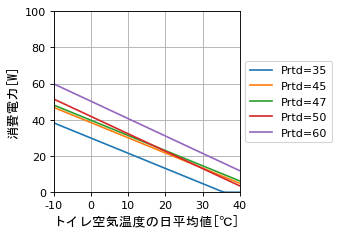

In [15]:
# 定格消費電力（確認用）の配列[W]
check_Prtd = np.array([[35],[45],[47],[50],[60]])

# トイレ空気温度（確認用）の配列[℃]
check_theta = np.array([])
for i in range(-10, 45, 1): 
    check_theta = np.hstack((check_theta, np.array([i])))

# 算定式による計算 
check_P = np.vectorize(P_opg_st_noninst)(check_Prtd, check_theta)

# 算定式による計算結果を散布図で表示
show_result(check_theta, check_P, check_Prtd, 'Prtd',  'トイレ空気温度の日平均値[℃]', -10, 40, '消費電力[W]', 0, 100)

* 洗浄水ヒータの加熱方式が非瞬間式の場合において、温水洗浄が機能することによる稼働時の消費電力：

$$ 
\begin{equation}
    \displaystyle P_{opg,wt,noninst,d,t} = max \left( 0.0, \left( -0.0144 \times \theta_{toilet,ave,d} + 0.5121 \times \left( \frac{P_{rtd,opg,wt}}{500} \right) \right) \times 1000 \bigg/ 24 \right)
\end{equation}
$$


ここで、  
$P_{opg,wt,inst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
$P_{rtd,opg,wt}$：洗浄水ヒータの定格消費電力[W]  
$\theta_{toilet,ave}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [16]:
def P_opg_wt_noninst(Prtd_opg_wt, theta_toilet_ave):
    """洗浄水ヒータの加熱方式が非瞬間式の場合において
    　 温水洗浄が機能することによる稼働時の消費電力を計算する[W]"""
    # Prtd_opg_ht：洗浄水ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    P = max (0.0, (-0.0144 * theta_toilet_ave + 0.5121 * (Prtd_opg_wt / 500)) * 1000 / 24)
    
    return P

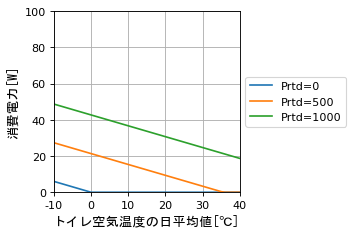

In [17]:
# 定格消費電力（確認用）の配列[W]
check_Prtd_h = np.array([])
for i in range(0, 1500, 500): 
    check_Prtd_h = np.hstack((check_Prtd_h, np.array([i])))
check_Prtd = check_Prtd_h.reshape([len(check_Prtd_h), 1])

# トイレ空気温度（確認用）の配列[℃]
check_theta = np.array([])
for i in range(-10, 45, 1): 
    check_theta = np.hstack((check_theta, np.array([i])))

# 算定式による計算 
check_P = np.vectorize(P_opg_wt_noninst)(check_Prtd, check_theta)

# 算定式による計算結果を散布図で表示
show_result(check_theta, check_P, check_Prtd, 'Prtd', 'トイレ空気温度の日平均値[℃]', -10, 40, '消費電力[W]', 0, 100)

* 便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において、暖房便座が機能することによる稼働時の消費電力：

$$ 
\begin{equation}
    \displaystyle P_{opg,st,d,t} = max \left(0.0, -0.195 \times \theta_{toilet,ave,d} + 8.313 \right)
\end{equation}
$$

ここで、  
$P_{opg,st,inst,d,t}$：便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$\theta_{toilet,ave,d}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [18]:
def P_opg_st_inst(theta_toilet_ave):
    """便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において、
    　 暖房便座が機能することによる稼働時の消費電力を計算する[W]"""
    # theta_toilet_ave：トイレ空気温度の日平均値[C]  
    
    P = max(0.0, -0.195 * theta_toilet_ave + 8.313)
    
    return P

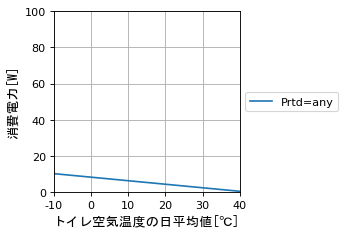

In [19]:
# 定格消費電力（確認用）の配列[W]
check_Prtd = np.array([])

# トイレ空気温度（確認用）の配列[℃]
check_theta = np.array([])
for i in range(-10, 45, 1): 
    check_theta = np.hstack((check_theta, np.array([i])))

# 算定式による計算 
check_P = np.vectorize(P_opg_st_inst)(check_theta)

# 算定式による計算結果を散布図で表示
show_result(check_theta, check_P, check_Prtd, 'Prtd', 'トイレ空気温度の日平均値[℃]', -10, 40, '消費電力[W]', 0, 100)

* 便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式の場合において、温水洗浄が機能することによる稼働時の消費電力：

$$
\begin{equation}
    \displaystyle P_{opg,wt,inst,d,t} =  max \left(0.0, \left(-1.274 \times 10^{-6} \times \theta_{toilet,ave,d} \times P_{rtd,opg,wt} + 0.0357 \times 10^{-3} \times P_{rtd,opg,wt} \right) \times 1000 \bigg/ 24 \right)
\end{equation}
$$

ここで、  
$P_{opg,wt,inst,d,t}$：便座ヒータの加熱方式、洗浄水ヒータの加熱方式が瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
$P_{rtd,opg,wt}$：洗浄水ヒータの定格消費電力[W]  
$\theta_{toilet,ave,d}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [20]:
def P_opg_wt_inst(Prtd_opg_wt, theta_toilet_ave):
    """便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式の場合において
    　 温水洗浄が機能することによる稼働時の消費電力を計算する[W]"""
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    P = max(0.0, (-1.274 * 10**-6 * theta_toilet_ave * Prtd_opg_wt + 0.0357 * 10**-3 * Prtd_opg_wt) * 1000 / 24)
    
    return P

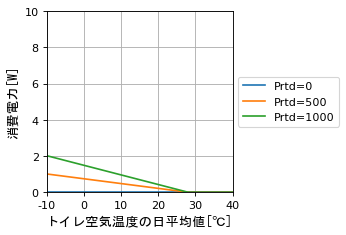

In [21]:
# 定格消費電力（確認用）の配列[W]
check_Prtd_h = np.array([])
for i in range(0, 1500, 500): 
    check_Prtd_h = np.hstack((check_Prtd_h, np.array([i])))
check_Prtd = check_Prtd_h.reshape([len(check_Prtd_h), 1])

# トイレ空気温度（確認用）の配列[℃]
check_theta = np.array([])
for i in range(-10, 45, 1): 
    check_theta = np.hstack((check_theta, np.array([i])))

# 算定式による計算 
check_P = np.vectorize(P_opg_wt_inst)(check_Prtd, check_theta)

# 算定式による計算結果を散布図で表示
show_result(check_theta, check_P, check_Prtd, 'Prtd', 'トイレ空気温度の日平均値[℃]', -10, 40, '消費電力[W]', 0, 10)

* 便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式の場合において、暖房便座が機能することによる稼働時の消費電力量と温水洗浄が機能することによる稼働時の消費電力との合計：

$$ 
\begin{equation}
    \displaystyle P_{opg,sw,inst,d,t} = max \left( 0.0, \left( -0.195 \times \theta_{toilet,ave,d} + 8.313 \right) \bigg/ \frac{5}{60} \right)
\end{equation}
$$

ここで、  
$P_{opg,sw,inst,d,t}$：便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式で、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力と温水洗浄が機能することによる稼働時の消費電力との合計[W]   
$\theta_{toilet,ave,d}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [22]:
def P_opg_sw_inst(theta_toilet_ave):
    """便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式で、
    　 暖房便座が機能することによる稼働時の消費電力量と温水洗浄が機能することによる稼働時の消費電力との合計を計算する[W]"""
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    P = max(0.0, (-0.195 * theta_toilet_ave + 8.313) / (5 / 60))
    
    return P

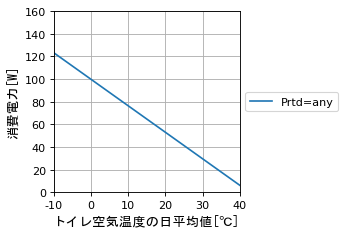

In [23]:
# 定格消費電力（確認用）の配列[W]
check_Prtd = np.array([])

# トイレ空気温度（確認用）の配列[℃]
check_theta = np.array([])
for i in range(-10, 45, 1): 
    check_theta = np.hstack((check_theta, np.array([i])))

# 算定式による計算 
check_P = np.vectorize(P_opg_sw_inst)(check_theta)

# 算定式による計算結果を散布図で表示
show_result(check_theta, check_P, check_Prtd, 'Prtd', 'トイレ空気温度の日平均値[℃]', -10, 40, '消費電力[W]', 0, 160)

### 7.5　待機時の消費電力

日付$d$の時刻$t$における待機時の消費電力は、暖房便座が機能することによる消費電力と温水洗浄が機能することによる消費電力の合計であり、以下の式により計算される。

* AC電源接続下での待機時の消費電力量：  
$$ 
\begin{equation}
    P_{sby,d,t} = P_{sby,st,d,t} + P_{sby,wt,d,t}
\end{equation}
$$

ここで、  
$P_{sby,st,d,t}$：日付$d$の時刻$t$における待機時の消費電力[W]  
$P_{sby,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
$P_{sby,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]  
である。

In [24]:
def P_sby(Prtd_opg_st, Prtd_opg_wt, seat_heater_type, water_heater_type, seat_heater_switch, theta_toilet_ave):
    """待機時の消費電力[W]を計算する"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W]  
    # Prtd_opg_ht：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_type：便座ヒータの加熱方式[非瞬間方式、瞬間方式]  
    # water_heater_type：洗浄水ヒータの加熱方式[非瞬間方式、瞬間方式]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]  
    
    if seat_heater_type == HeaterType.NonInst and water_heater_type == HeaterType.NonInst:
        P_sby =  P_sby_noninst_noninst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave)
    
    elif seat_heater_type == HeaterType.Inst and water_heater_type == HeaterType.NonInst:
        P_sby = P_sby_inst_noninst(Prtd_opg_wt, seat_heater_switch, theta_toilet_ave)
    
    elif seat_heater_type == HeaterType.NonInst and water_heater_type == HeaterType.Inst:
        P_sby = P_sby_noninst_inst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave)
    
    elif seat_heater_type == HeaterType.Inst and water_heater_type == HeaterType.Inst:
        P_sby = P_sby_inst_inst(Prtd_opg_wt, theta_toilet_ave)
            
    return P_sby

日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力および日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力は、便座ヒータおよび洗浄水ヒータの加熱方式に応じて以下の式により計算される。

* 便座ヒータと洗浄水ヒータの両方の加熱方式が非瞬間方式の場合：  
    * 暖房便座が機能することによる消費電力： 
        * 便座ヒータの電源がオフ：
        $$  
        \begin{equation}
            \displaystyle P_{sby,st,d,t} = 0
        \end{equation}
        $$
        * 便座ヒータの電源がオン：
        $$  
        \begin{equation}
            \displaystyle P_{sby,st,d,t} = P_{sby,st,noninst,d,t}
        \end{equation}
        $$
        
    * 温水洗浄が機能することによる消費電力：
    $$ 
    \begin{equation}
        \displaystyle P_{sby,wt,d,t} =  P_{sby,wt,noninst,d,t}
    \end{equation}
    $$

ここで、  
$P_{sby,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
$P_{sby,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]   
$P_{sby,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]  
$P_{sby,wt,noninst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]    
である。  

In [25]:
def P_sby_noninst_noninst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave):
    """便座ヒータと洗浄水ヒータの両方の加熱方式が非瞬間方式の場合の待機時の消費電力を計算する[W]"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W] 
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]   
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    # 暖房便座が機能することによる消費電力[W]
    if seat_heater_switch == HeaterSwitch.Off:
        P_sby_st = 0       
    elif seat_heater_switch == HeaterSwitch.On:
        P_sby_st = P_sby_st_noninst(Prtd_opg_st, theta_toilet_ave)
   
    # 温水洗浄が機能することによる消費電力[W]
    P_sby_wt = P_sby_wt_noninst(Prtd_opg_wt, theta_toilet_ave) 
    
    return P_sby_st + P_sby_wt

* 便座ヒータの加熱方式が瞬間方式＋洗浄水ヒータの加熱方式が非瞬間方式の場合：  
    * 暖房便座が機能することによる消費電力：  
        * 便座ヒータの電源がオフ：
        $$  
        \begin{equation}
            \displaystyle P_{sby,st,d,t} = 0
        \end{equation}
        $$
        * 便座ヒータの電源がオン：
        $$  
        \begin{equation}
            \displaystyle P_{sby,st,d,t} = P_{sby,st,inst,d,t}
        \end{equation}
        $$

    * 温水洗浄が機能することによる消費電力：
    $$ 
    \begin{equation}
        \displaystyle P_{sby,wt,d,t} =  P_{sby,wt,noninst,d,t}
    \end{equation}
    $$

ここで、  
$P_{sby,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
$P_{sby,wt,noninst,d,t}$：便座ヒータの加熱方式が瞬間方式、洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W] 
$P_{sby,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能する場合の待機時の消費電力[W]  
$P_{sby,wt,noninst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]    
である。  

In [26]:
def P_sby_inst_noninst(Prtd_opg_wt, seat_heater_switch, theta_toilet_ave):
    """便座ヒータの加熱方式が瞬間方式＋洗浄水ヒータの加熱方式が非瞬間方式の場合の待機時の消費電力を計算する[W]"""
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン] 
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    # 暖房便座が機能することによる消費電力[W]
    if seat_heater_switch == HeaterSwitch.Off:
        P_sby_st = 0
    elif seat_heater_switch == HeaterSwitch.On:
        P_sby_st = P_sby_st_inst()
    
    # 温水洗浄が機能することによる消費電力[W]
    P_sby_wt = P_opg_wt_noninst(Prtd_opg_wt, theta_toilet_ave)

    return P_opg_st + P_opg_wt

* 便座ヒータの加熱方式が非瞬間方式＋洗浄水ヒータの加熱方式が瞬間方式の場合：  
    * 暖房便座が機能することによる消費電力：
        * 便座ヒータの電源がオフ：   
        $$  
        \begin{equation}
            \displaystyle P_{sby,st,d,t} = 0
        \end{equation}
        $$
        * 便座ヒータの電源がオン：
        $$  
        \begin{equation}
            \displaystyle P_{sby,st,d,t} = P_{sby,st,noninst,d,t}
        \end{equation}
        $$
            
    * 温水洗浄が機能することによる消費電力：
        $$ 
        \begin{equation}
            \displaystyle P_{sby,wt,d,t} =  P_{sby,wt,inst,d,t}
        \end{equation}
        $$

ここで、  
$P_{sby,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
$P_{sby,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]    
$P_{sby,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]  
$P_{sby,wt,inst,d,t}$：便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式で、日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]   
である。  

In [27]:
def P_sby_noninst_inst(Prtd_opg_st, Prtd_opg_wt, seat_heater_switch, theta_toilet_ave):
    """便座ヒータの加熱方式が非瞬間方式＋洗浄水ヒータの加熱方式が瞬間方式の場合の稼働時の消費電力を計算する[W]"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W] 
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
            
    # 暖房便座が機能することによる消費電力[W]
    if seat_heater_switch == HeaterSwitch.Off:
        P_sby_st = 0 
    elif seat_heater_switch == HeaterSwitch.On:
        P_sby_st =P_sby_st_noninst(Prtd_opg_st, theta_toilet_ave)

    # 温水洗浄が機能することによる消費電力[W]
    P_sby_wt = P_sby_wt_inst()
    
    return P_opg_st + P_opg_wt

* 便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間方式の場合（便座ヒータのオフは考慮しない）：  
    * 暖房便座が機能することによる消費電力と温水洗浄が機能することによる消費電力との合計：
    $$
        \begin{equation}
            \displaystyle P_{sby,st,d,t} + P_{sby,wt,d,t} = P_{sby,sw,inst,d,t}
        \end{equation}
    $$

ここで、  
$P_{sby,st,d,t}$：日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
$P_{sby,sw,inst,d,t}$：便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式で、便座ヒータと洗浄水ヒータのいずれか一方もしくは両方の電源がオンの場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力と温水洗浄が機能することによる待機時の消費電力との合計[W]  
$P_{sby,wt,d,t}$：日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]    
である。  

In [28]:
def P_sby_inst_inst(Prtd_opg_wt, theta_toilet_ave):
    """便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間方式の場合の待機時の消費電力を計算する[W]"""
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    # 暖房便座が機能することによる稼働時の消費電力と温水洗浄が機能することによる待機時の消費電力との合計[W]
    P_sby_sw = P_sby_sw_inst(theta_toilet_ave) 
    
    return P_opg_sw

暖房便座が機能することによる待機時の消費電力および温水洗浄が機能することによる待機時の消費電力は、便座ヒータおよび洗浄水ヒータの加熱方式およびヒータ電源の状態に応じて以下の式により計算される。ただし、計算値がマイナスの場合は消費電力はゼロとする。

* 便座ヒータの加熱方式が非瞬間式の場合において、暖房便座が機能することによる待機時の消費電力：

$$ 
\begin{equation}
    \displaystyle P_{sby,st,noninst,d,t} = P_{opg,st,noninst,d,t}
\end{equation}
$$  

ここで、  
$P_{opg,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる稼働時の消費電力[W]  
$P_{sby,st,noninst,d,t}$：便座ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
である。

In [29]:
def P_sby_wt_noninst(Prtd_opg_st, theta_toilet_ave):
    """便座ヒータの加熱方式が非瞬間式の場合において
    　 暖房便座が機能することによる待機時の消費電力を計算する[W]"""
    # Prtd_opg_st：便座ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    P = P_opg_st_noninst(Prtd_opg_st, theta_toilet_ave)
    
    return P

* 洗浄水ヒータの加熱方式が非瞬間式の場合において、温水洗浄が機能することによる待機時の消費電力：

$$ 
\begin{equation}
    \displaystyle P_{sby,wt,noninst,d,t} = P_{opg,wt,noninst,d,t}
\end{equation}
$$

ここで、  
$P_{opg,wt,inst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる稼働時の消費電力[W]  
$P_{sby,wt,inst,d,t}$：洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]  
である。

In [30]:
def P_sby_wt_noninst(Prtd_opg_wt, theta_toilet_ave):
    """洗浄水ヒータの加熱方式が非瞬間式の場合において
    　 温水洗浄が機能することによる待機時の消費電力を計算する[W]"""
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    P = P_opg_wt_noninst(Prtd_opg_wt, theta_toilet_ave)
    
    return P

* 便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において、暖房便座が機能することによる待機時の消費電力：

$$ 
\begin{equation}
    \displaystyle P_{sby,st,inst,d,t} = 0
\end{equation}
$$  

ここで、  
$P_{sby,st,inst,d,t}$：便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力[W]  
である。

In [31]:
def P_sby_st_inst():
    """便座ヒータの加熱方式が瞬間式、洗浄水ヒータの加熱方式が非瞬間式の場合において
    　 暖房便座が機能することによる待機時の消費電力を計算する[W]"""
    
    P = 0.0
    
    return P

* 便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式の場合において、温水洗浄が機能することによる待機時の消費電力：

$$ 
\begin{equation}
    \displaystyle P_{sby,wt,inst,d,t} = 0
\end{equation}
$$  

ここで、  
$P_{sby,wt,inst,d,t}$：便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式の場合において、日付$d$の時刻$t$において温水洗浄が機能することによる待機時の消費電力[W]  
である。

In [32]:
def P_sby_wt_inst():
    """便座ヒータの加熱方式が非瞬間式、洗浄水ヒータの加熱方式が瞬間式の場合において
    　 温水洗浄が機能することによる待機時の消費電力を計算する[W]"""
    
    P = 0.0
    
    return P

* 便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式の場合において、暖房便座が機能することによる待機時の消費電力量と温水洗浄が機能することによる待機時の消費電力との合計：

$$ 
\begin{equation}
    \displaystyle P_{sby,sw,inst,d,t} = max \left(0.0, -0.984 \times \theta_{toilet,ave,d} + 17.886 \right)
\end{equation}
$$

ここで、  
$P_{sby,sw,inst,d,t}$：便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式の場合において、日付$d$の時刻$t$において暖房便座が機能することによる待機時の消費電力量と温水洗浄が機能することによる待機時の消費電力との合計[W]   
$\theta_{toilet,ave,d}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [33]:
def P_sby_sw_inst(theta_toilet_ave):
    """便座ヒータと洗浄水ヒータの両方の加熱方式が瞬間式の場合において
    　 暖房便座が機能することによる待機時の消費電力量と温水洗浄が機能することによる待機時の消費電力との合計[W]"""
    # theta_toilet_ave：トイレ空気温度の日平均値[C]

    P = max(0.0, -0.984 * theta_toilet_ave + 17.886)
    
    return P

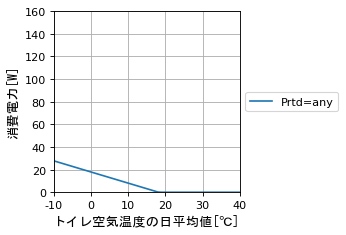

In [34]:
# 定格消費電力（確認用）の配列[W]
check_Prtd = np.array([])

# トイレ空気温度（確認用）の配列[℃]
check_theta = np.array([])
for i in range(-10, 45, 1): 
    check_theta = np.hstack((check_theta, np.array([i])))

# 算定式による計算 
check_P = np.vectorize(P_sby_sw_inst)(check_theta)

# 算定式による計算結果を散布図で表示
show_result(check_theta, check_P, check_Prtd, 'Prtd', 'トイレ空気温度の日平均値[℃]', -10, 40, '消費電力[W]', 0, 160)

### 7.4　標準条件

#### 7.4.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

| 番号 | 便座ヒータの定格消費電力[W] | 洗浄水ヒータの定格消費電力[W] | 便座ヒータの加熱方式 | 洗浄水ヒータの加熱方式| 便座ヒータのオフ | 備考 |
|:----:| :-------------------------: | :---------------------------: | :------------------: | :-------------------: | :--: | :--: |  
|  01  | 50                          | 500                           | 非瞬間式             | 非瞬間式              | 可   | -    |
|  02  | 50                          | 1200                          | 非瞬間式             | 瞬間式                | 可   | 4人標準世帯のデフォルト設定 |
|  03  | 50                          | 500                           | 瞬間式               | 非瞬間式              | 可   | -    |
|  04  | 50                          | 1068                          | 瞬間式               | 瞬間式                | 不可 | -    |

In [35]:
# 機器仕様
Spec = namedtuple ("Spec", "Prtd_opg_st Prtd_opg_wt seat_heater_type water_heater_type")
    # Prtd_opg_st：便座ヒータの定格消費電力[W]  
    # Prtd_opg_wt：洗浄水ヒータの定格消費電力[W]  
    # seat_heater_type：便座ヒータの加熱方式[非瞬間方式、瞬間方式]  
    # water_heater_type：洗浄水ヒータの加熱方式[非瞬間方式、瞬間方式] 

In [36]:
#仕様01（便座ヒータ：非瞬間方式、洗浄水ヒータ：非瞬間方式）
spec01 = Spec(Prtd_opg_st = 50, Prtd_opg_wt =  500, seat_heater_type = HeaterType.NonInst, water_heater_type = HeaterType.NonInst )

#仕様02（便座ヒータ：非瞬間方式、洗浄水ヒータ：瞬間方式）
spec02 = Spec(Prtd_opg_st = 50, Prtd_opg_wt = 1200, seat_heater_type = HeaterType.NonInst, water_heater_type = HeaterType.Inst )

#仕様03（便座ヒータ：瞬間方式、洗浄水ヒータ：非瞬間方式）
spec03 = Spec(Prtd_opg_st = 50, Prtd_opg_wt =  500, seat_heater_type = HeaterType.Inst,    water_heater_type = HeaterType.NonInst )

#仕様04（便座ヒータ：瞬間方式、洗浄水ヒータ：瞬間方式）
spec04 = Spec(Prtd_opg_st = 50, Prtd_opg_wt = 1068, seat_heater_type = HeaterType.Inst,    water_heater_type = HeaterType.Inst )

In [37]:
# 機器リスト
App_List = namedtuple ("App_List", "app01 app02 app03 app04")
    # toiletseat@：温水暖房洗浄便座No＠の仕様

In [38]:
# 自立P4の機器リスト
app_list =  App_List(app01 = spec01, app02 = spec02, app03 = spec03, app04 = spec04)

#### 7.4.2　機器使用スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

* 平日（1階）：  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  5|  0|  5|  0|  5|  0|  5|  0|  0|  0|  5|  5|  0|  5|  0|  0|  5|  5|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 55| 60| 55| 60| 55| 60| 55| 60| 60| 60| 55| 55| 60| 55| 60| 60| 55| 55| 

* 休日在宅（1階）：  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0| 10|  5|  0|  0|  0|  0|  5|  0|  0|  5|  0|  0|  5|  5|  5|  5|  5|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 50| 55| 60| 60| 60| 60| 55| 60| 60| 55| 60| 60| 55| 55| 55| 55| 55| 

* 休日外出（1階）：  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  5|  5|  5|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  5|  5|  5|  5|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 55| 55| 55| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 55| 55| 55| 55| 

* 平日（2階）：  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0| 10|  5|  0|  0|  0|  0|  0|  0|  0|  0|  5|  5|  5|  5|  5|  0| 10|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 50| 55| 60| 60| 60| 60| 60| 60| 60| 60| 55| 55| 55| 55| 55| 60| 50| 

* 休日在宅（2階）：  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0| 10|  5|  5|  5|  5|  0|  0|  0|  5|  5|  0|  0|  5|  0| 10|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 50| 55| 55| 55| 55| 60| 60| 60| 55| 55| 60| 60| 55| 60| 50| 60| 

* 休日外出（2階）：  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0| 15|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  5|  5| 10|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 45| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 55| 55| 50| 60| 

In [39]:
# 機器使用スケジュール
Schedule = namedtuple ("Schedule", "weekdays holidays_st holidays_go")
    # weekdays：平日
    # holidays_st：休日在宅
    # holidays_go：休日外出

In [40]:
# 4人標準世帯_1階：AC接続下での稼働時間[s]
schd_ac_opg_4p_std_1f = Schedule(weekdays = [0]*6 + [300]*1 + [0]*1 + [300]*1 + [0]*1+ [300]*1 + [0]*1 + [300]*1 + [0]*3 + [300]*2 + [0]*1 + [300]*1 + [0]*2 + [300]*2,  
                                 holidays_st = [0]*7 + [600]*1 + [300]*1 + [0]*4 + [300]*1 + [0]*2 + [300]*1 + [0]*2 + [300]*5, 
                                 holidays_go = [0]*6 + [300]*3 + [0]*11 + [300]*4)
# 4人標準世帯_1階：AC接続下での待機時間[s]
schd_ac_sby_4p_std_1f = Schedule(weekdays = [3600]*6 + [3300]*1 + [3600]*1 + [3300]*1 + [3600]*1+ [3300]*1 + [3600]*1 + [3300]*1 + [3600]*3 + [3300]*2 + [3600]*1 + [3300]*1 + [3600]*2 + [3300]*2,  
                                 holidays_st = [3600]*7 + [3000]*1 + [3300]*1 + [3600]*4 + [3300]*1 + [3600]*2 + [3300]*1 + [3600]*2 + [3300]*5, 
                                 holidays_go = [3600]*6 + [3300]*3 + [3600]*11 + [3300]*4)

In [41]:
# 4人標準世帯_2階：AC接続下での稼働時間[s]
schd_ac_opg_4p_std_2f = Schedule(weekdays = [0]*7 + [600]*1 + [300]*1 + [0]*8 + [300]*5 + [0]*1 + [300]*1,  
                                 holidays_st = [0]*8 + [600]*1 + [300]*4 + [0]*3 + [300]*2 + [0]*2 + [300]*1 + [0]*1 + [600]*1 + [0]*1, 
                                 holidays_go = [0]*8 + [900]*1 + [0]*11 + [300]*2 + [600]*1 + [0]*1)
# 4人標準世帯_2階：AC接続下での待機時間[s]
schd_ac_sby_4p_std_2f = Schedule(weekdays = [3600]*7 + [3000]*1 + [3300]*1 + [3600]*8 + [3300]*5 + [3600]*1 + [3300]*1,  
                                 holidays_st = [3600]*8 + [3000]*1 + [3300]*4 + [3600]*3 + [3300]*2 + [3600]*2 + [3300]*1 + [3600]*1 + [3000]*1 + [3600]*1, 
                                 holidays_go = [3600]*8 + [2700]*1 + [3600]*11 + [3300]*2 + [3600]*1 + [3600]*1)

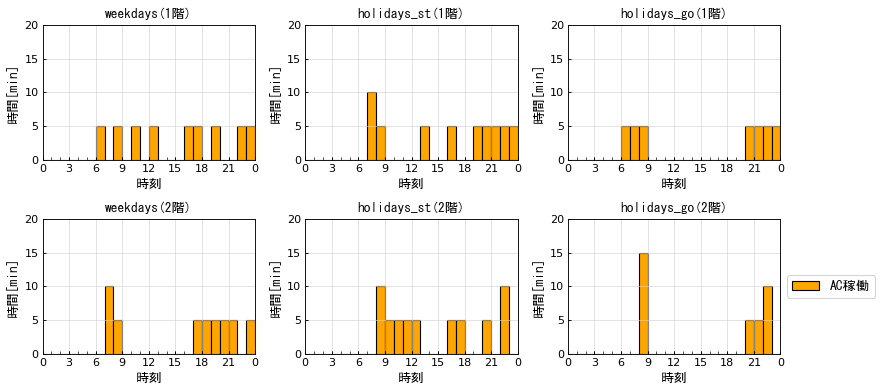

In [42]:
# 機器使用スケジュールの確認
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)
    
# サブプロットの作成
plt.figure(figsize=(10, 5), dpi=80)

for i in range(2):
    if i == 0:
        schd_ac_opg = schd_ac_opg_4p_std_1f 
        schd_ac_sby = schd_ac_sby_4p_std_1f
    else:
        schd_ac_opg = schd_ac_opg_4p_std_2f 
        schd_ac_sby = schd_ac_sby_4p_std_2f
        
    for j in range(3):
        # サブプロットの指定
        ax = plt.subplot2grid((2, 3), (i, j))
        
        # 棒グラフの作成
        x = np.array([k for k in range(24)])
        y_opg =  np.array(schd_ac_opg[j]) / 60
        ax.bar(x, y_opg, align='edge', width=1.0, color='orange', edgecolor='black', label="AC稼働")
        
        # グラフのタイトル
        ax.set_title(schd_ac_opg._fields[j] + '(' + str(i+1) + '階)' , fontdict={'fontproperties':fp})
        
        # x軸
        # タイトル
        ax.set_xlabel(u'時刻', fontdict={'fontproperties':fp})
        # 目盛りの位置／ラベル／形式
        # 主目盛
        ax.set_xticks(np.arange(0, 25, 3), minor=False)
        ax.set_xticklabels(np.array([k*3 for k in range(8)]+[0]).astype('str'), minor=False, visible=True)
        ax.tick_params(axis='x', which ='major', direction='in', length=3)
        # 補助目盛
        ax.set_xticks(np.arange(0, 25, 1), minor=True)
        ax.set_xticklabels(np.array([k for k in range(24)]+[0]).astype('str'), minor=True, visible=False)
        ax.tick_params(axis='x', which ='minor', direction='in', length=3)
        # 表示の上限・下限
        ax.set_xbound(lower=0, upper=24)
        
        # y軸
        #タイトル
        ax.set_ylabel(u'時間[min]', fontdict={'fontproperties':fp}) 
        # 目盛りの位置／形式
        ax.set_yticks(np.arange(0, 30, 5))
        ax.tick_params(axis='y', which ='major', direction='in', length=3)
        # 表示の上限・下限
        ax.set_ybound(lower=0, upper=20)

        # グラフの枠
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.spines['top'].set_color('black')
        
        # 主目盛りのグリッド
        ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()

plt.show()

In [43]:
# 単位時間において各状態が維持される時間の合計
DT = namedtuple ("DT", "ac_opg ac_sby")
    # ac_opg：AC接続下における稼働時間の合計[s]
    # ac_sby：AC接続下における待機時間の合計[s]

#### 7.4.3　暖房便座の機能に関する居住者の使用行動

居住者の使用行動は、通年で暖房便座を使用する場合とトイレ空気温度に応じて使用する場合との2パターンを想定する。

| 番号 |概要                                     | 備考 |
|:----:| :-------------------------------------: | :--: |  
|  01  | 通年で暖房便座を使用する                | 4人標準世帯のデフォルト設定 |
|  02  | トイレ空気温度に応じて暖房便座を使用する| 省エネ |


In [57]:
# 使用行動
UserBehavior = namedtuple ("UserBehavior", "seat_heater")
    # seat_heater：暖房便座の機能に関する居住者の使用行動[文字列]  

In [45]:
# 使用行動01（通年使用：標準タイプ）
user_behavior01 = UserBehavior(seat_heater = "all_year_round")

# 使用行動02（低温時のみ使用：省エネタイプ）
user_behavior02 = UserBehavior(seat_heater = "at_lower_temp")

In [46]:
# 使用行動リスト
UserBehavior_List = namedtuple ("UserBehavior_List", "user_behavior01 user_behavior02")
    # user_behavior@：使用行動No＠のタイプ

In [47]:
# 自立P4の使用行動リスト
user_behavior_list =  UserBehavior_List(user_behavior01 = user_behavior01, user_behavior02 = user_behavior02)

In [48]:
def  seat_heater_switch(user_behavior_seat_heater_, theta_toilet_ave):
    """便座ヒータの電源スイッチの状態を決定する[On/Off]"""
    # user_behavior_seat_heater：暖房便座の機能に関する居住者の使用行動[all_year_round/ at_lower_temp]
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    if user_behavior_seat_heater == "all_year_round":
        seat_heater_switch = use_seat_heater_all_year_round()
    elif user_behavior_seat_heater == "at_lower_temp":
        seat_heater_switch = use_seat_heater_at_lower_temp(theta_toilet_ave)
    
    return seat_heater_switch

* 通年で暖房便座の機能を使用する場合（標準条件）:便座ヒータの電源は常にオンとする。

In [49]:
def use_seat_heater_all_year_round():
    
    return HeaterSwitch.On

* トイレ空気温度に応じて暖房便座の機能を使用する場合：トイレ空気温度の日平均値が20℃以上の場合、暖房便座ヒータの電源をオフとする。

In [50]:
def use_seat_heater_at_lower_temp(theta_toilet_ave):
    
    if theta_toilet_ave < 20:
        seat_heater_switch == HeaterSwitch.On
    else:
        seat_heater_switch == HeaterSwitch.Off
    
    return seat_heater_switch

### 8.　トイレ空気温度の日平均値

トイレ空気温度が直接的にも求まらない場合、日平均外気温度および住宅の熱損失係数を用いて以下の式により推定した値を用いることができる。

* 暖房方式が居室間欠の場合：  
    * 1階：
    $$ 
    \begin{equation}
        \displaystyle \theta_{toilet,ave,d} = \left( 0.0580 \times Q + 0.5186 \right) \times \theta_{ex,ave,d} + \left( -1.614 \times Q + 16.88 \right)
    \end{equation}
    $$
    
    * 2階：
    $$ 
    \begin{equation}
        \displaystyle \theta_{toilet,ave,d} = \left( 0.0499 \times Q + 0.6023 \right) \times \theta_{ex,ave,d} + \left( -1.493 \times Q + 14.15 \right)
    \end{equation}
    $$

* 暖房方式が全館連続の場合：  
    * 1階：
    $$ 
    \begin{equation}
        \displaystyle \theta_{toilet,ave,d} = \left( 0.0669 \times Q + 0.3721 \right) \times \theta_{ex,ave,d} + \left( -1.738 \times Q + 19.703 \right)
    \end{equation}
    $$
    
    * 2階：
    $$ 
    \begin{equation}
        \displaystyle \theta_{toilet,ave,d} = \left( 0.0619 \times Q + 0.4117 \right) \times \theta_{ex,ave,d} + \left( -1.655 \times Q + 17.85 \right)
    \end{equation}
    $$

ここで、  
$\theta_{ex,ave,d}$：日付$d$における外気温の日平均値[℃]  
$\theta_{toilet,ave,d}$：日付$d$におけるトイレ空気温度の日平均値[℃]  
である。

In [51]:
class HeatingType(Enum):
    """暖房方式"""
    # HabitableRoom：居室間欠
    # WholeHouse：全館連続

    HabitableRoom = "habitable_room"
    WholeHouse = "whole_house"

In [52]:
class Floor(Enum):
    """階"""
    # 1F：1階
    # 2F：2階

    FirstFloor = "first_floor"
    SecondFloor = "second_floor"

In [53]:
def theta_toilet_ave(theta_ex_ave, Q_value, heating_type, floor):
    """トイレ空気温度の日平均値を計算する[℃]""" 
    # theta_ex_ave：外気温度の日平均値[C]
    # Q_value：住宅の熱損失係数[W/m2] 
    # heating_type：暖房方式[居室間欠、全館連続] 
    # floor：階[1階、2階] 
    
    if heating_type == HeatingType.HabitableRoom:
        if floor == Floor.FirstFloor:
            theta_toilet_ave = (0.0580 * Q_value + 0.5186) * theta_ex_ave + (-1.612 * Q_value + 16.88)
        elif floor == Floor.SecondFloor:
            theta_toilet_ave = (0.0499 * Q_value + 0.6023) * theta_ex_ave + (-1.493 * Q_value + 14.15)
    elif heating_type == HeatingType.WholeHouse:
        if floor == Floor.FirstFloor:
            theta_toilet_ave = (0.0669 * Q_value + 0.3721) * theta_ex_ave + (-1.738 * Q_value + 19.703)
        elif floor == Floor.SecondFloor:
            theta_toilet_ave = (0.0619 * Q_value + 0.4117) * theta_ex_ave + (-1.655 * Q_value + 17.85)
    
    return theta_toilet_ave

In [54]:
# 外気温度の日平均値（確認用）の配列[℃]
check_theta_ex_ave = np.array([])
for i in range(-10, 45, 1): 
    check_theta_ex_ave = np.hstack((check_theta_ex_ave, np.array([i])))

# 住宅の熱損失係数（確認用）の配列[W]
check_Q_value = np.array([[1.6],[1.9],[2.4],[2.7],[3.7]])

# 算定式による計算 
# 居室間欠 - 1階
check_theta_toilet_aveH1F = np.vectorize(theta_toilet_ave)(check_theta_ex_ave, check_Q_value, HeatingType.HabitableRoom, Floor.FirstFloor)
# 居室間欠 - 2階
check_theta_toilet_aveH2F = np.vectorize(theta_toilet_ave)(check_theta_ex_ave, check_Q_value, HeatingType.HabitableRoom, Floor.SecondFloor)
# 全館連続 - 1階
check_theta_toilet_aveW1F = np.vectorize(theta_toilet_ave)(check_theta_ex_ave, check_Q_value, HeatingType.WholeHouse, Floor.FirstFloor)
# 全館連続 - 2階
check_theta_toilet_aveW2F = np.vectorize(theta_toilet_ave)(check_theta_ex_ave, check_Q_value, HeatingType.WholeHouse, Floor.SecondFloor)

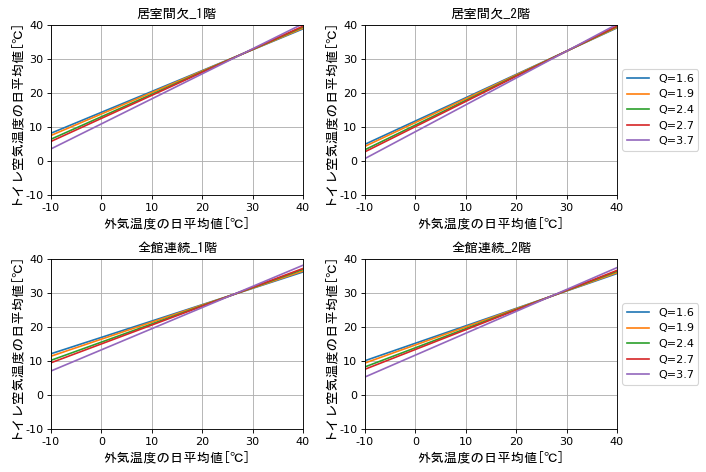

In [55]:
# 算定式による計算結果を散布図で表示
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)
    
# サブプロットの作成
plt.figure(figsize=(8, 6), dpi=80)

for irow in range(2):
    for icolumn in range(2):
        if irow == 0 and icolumn == 0:
            check_theta_toilet_ave = check_theta_toilet_aveH1F 
            fig_title = '居室間欠_1階'
        elif irow == 0 and icolumn == 1:
            check_theta_toilet_ave = check_theta_toilet_aveH2F 
            fig_title = '居室間欠_2階'
        elif irow == 1 and icolumn == 0:
            check_theta_toilet_ave = check_theta_toilet_aveW1F 
            fig_title = '全館連続_1階'
        elif irow == 1 and icolumn == 1:
            check_theta_toilet_ave = check_theta_toilet_aveW2F 
            fig_title = '全館連続_2階'
        
        # サブプロットの指定
        ax = plt.subplot2grid((2, 2), (irow, icolumn))
        
        # 棒グラフの作成
        for i in range(0, len(check_Q_value)):
            x = np.array(check_theta_ex_ave)
            y =  np.array(check_theta_toilet_ave[i])
            ax.plot(x, y, label = 'Q=' + str(check_Q_value[i][0]))
        
        # グラフのタイトル
        ax.set_title(fig_title, fontdict={'fontproperties':fp})
        
        # 軸の設定
        ax=plt.gca()
        # x軸
        # タイトル
        ax.set_xlabel('外気温度の日平均値[℃]', fontdict={'fontproperties':fp})
        # 表示の上限・下限
        ax.set_xbound(lower=-10, upper=40)
        # ラベルの書式
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
        # y軸
        # タイトル
        ax.set_ylabel('トイレ空気温度の日平均値[℃]', fontdict={'fontproperties':fp})
        # 表示の上限・下限
        ax.set_ybound(lower=-10, upper=40)
        # ラベルの書式
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

        # メモリ線の表示
        plt.grid()
    
        # グラフの重なりを解消
        plt.tight_layout()

    # 凡例
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True)

        
plt.show()

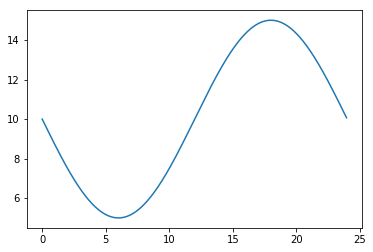

In [56]:
x = np.arange(0, 24, 0.05)
y = np.sin(x / 12 * np.pi + np.pi) * 5 + 10
plt.plot(x, y)